<a href="https://colab.research.google.com/github/YasiruMethmal123/Do-U-Have-Pneumonia/blob/main/script/Pneumonia_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pip install ultralytics -q


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.6 MB/s eta 0:00:00


In [5]:
import os
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Update this path to where you stored it in Drive
DATASET_PATH = "/content/drive/MyDrive/ML/Pnumonia/chest_xray"

In [4]:
for split in ["train", "val", "test"]:
    for cls in ["NORMAL", "PNEUMONIA"]:
        path = os.path.join(DATASET_PATH, split, cls)
        count = len(os.listdir(path)) if os.path.exists(path) else 0
        print(f"{split}/{cls}: {count} images")

train/NORMAL: 1295 images
train/PNEUMONIA: 3901 images
val/NORMAL: 8 images
val/PNEUMONIA: 8 images
test/NORMAL: 234 images
test/PNEUMONIA: 390 images


In [6]:
from cv2 import edgePreservingFilter
model = YOLO("yolov8m-cls.pt")

results = model.train(
    data = DATASET_PATH,
    epochs = 20,
    imgsz = 224,
    batch = 32,
    patience = 5,
    lr0 = 0.001,
    optimizer = "Adam",
    project="/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo",
    name = "yolov8m-chest",
    pretrained = True,
    device = 0,
    workers = 2,
    augment=True
)

Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=True, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/ML/Pnumonia/chest_xray, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=yolov8m-chest, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, 

In [7]:
metrics = model.val(
    data=DATASET_PATH,
    split="test",
    imgsz=224,
    batch=32,
)

print(f"Top-1 Accuracy: {metrics.top1:.4f}")
print(f"Top-5 Accuracy: {metrics.top5:.4f}")

Ultralytics 8.4.18 🚀 Python-3.12.12 torch-2.10.0+cu128 CUDA:0 (Tesla T4, 14913MiB)
YOLOv8m-cls summary (fused): 42 layers, 15,765,218 parameters, 0 gradients, 41.6 GFLOPs
train: /content/drive/MyDrive/ML/Pnumonia/chest_xray/train... found 5196 images in 2 classes ✅ 
val: /content/drive/MyDrive/ML/Pnumonia/chest_xray/val... found 16 images in 2 classes ✅ 
test: /content/drive/MyDrive/ML/Pnumonia/chest_xray/test... found 624 images in 2 classes ✅ 
test: Fast image access ✅ (ping: 3.9±7.7 ms, read: 11.2±23.9 MB/s, size: 247.4 KB)
test: Scanning /content/drive/MyDrive/ML/Pnumonia/chest_xray/test... 624 images, 0 corrupt: 100% ━━━━━━━━━━━━ 624/624 4.7it/s 2:12
test: New cache created: /content/drive/MyDrive/ML/Pnumonia/chest_xray/test.cache
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 20/20 1.1it/s 17.6s
                   all      0.971          1
Speed: 0.3ms preprocess, 1.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/runs/classify/val

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

base = "/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo"

for root, dirs, files in os.walk(base):
    for file in files:
        print(os.path.join(root, file))



/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/args.yaml
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/train_batch0.jpg
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/train_batch1.jpg
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/train_batch2.jpg
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/results.csv
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/train_batch1630.jpg
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/train_batch1631.jpg
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/train_batch1632.jpg
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/val_batch0_labels.jpg
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/val_batch0_pred.jpg
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/confusion_matrix_normalized.png
/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest/confusion_matrix.png
/con

In [14]:
for folder in os.listdir(base):
    print(folder)

yolov8m-chest


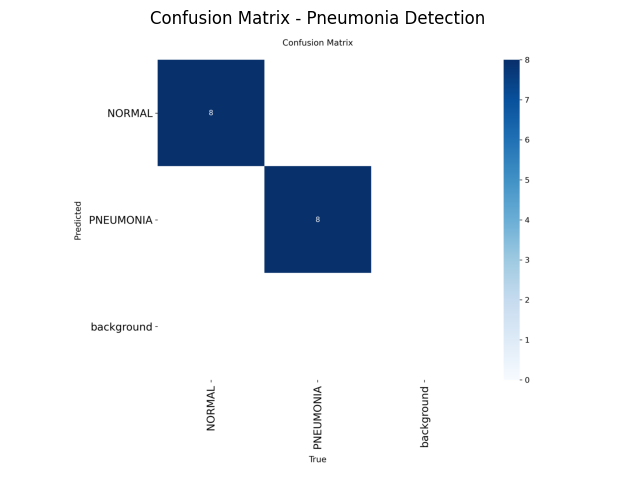

In [20]:
# Replace with the actual folder name you found above
results_path = "/content/drive/MyDrive/ML/Pnumonia/pneumonia_yolo/yolov8m-chest"  # ← fix here

img = Image.open(f"{results_path}/confusion_matrix.png")
plt.figure(figsize=(8, 6))
plt.imshow(img)
plt.axis("off")
plt.title("Confusion Matrix - Pneumonia Detection")
plt.show()

Using image: /content/drive/MyDrive/ML/Pnumonia/chest_xray/test/PNEUMONIA/VIRUS-1352878-0006.jpeg

image 1/1 /content/drive/MyDrive/ML/Pnumonia/chest_xray/test/PNEUMONIA/VIRUS-1352878-0006.jpeg: 224x224 PNEUMONIA 1.00, NORMAL 0.00, 6.1ms
Speed: 11.2ms preprocess, 6.1ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


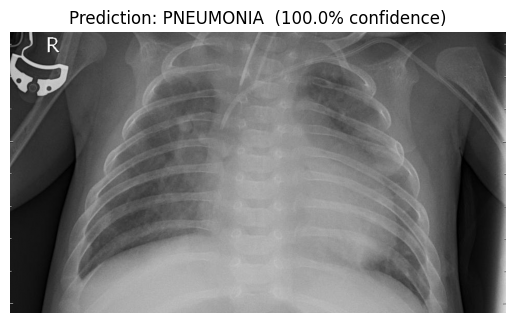

In [19]:
import os
import random

# Directory where the test pneumonia images are located
pneumonia_test_dir = "/content/drive/MyDrive/ML/Pnumonia/chest_xray/test/PNEUMONIA"

# List all files in the directory
all_files = os.listdir(pneumonia_test_dir)

# Filter for image files (assuming common image extensions)
image_files = [f for f in all_files if f.lower().endswith(('.jpeg', '.jpg', '.png'))]

if image_files:
    # Pick a random image from the list
    img_filename = random.choice(image_files)
    img_path = os.path.join(pneumonia_test_dir, img_filename)
    print(f"Using image: {img_path}")

    pred = model.predict(img_path, imgsz=224)
    result = pred[0]

    label = result.names[result.probs.top1]
    confidence = result.probs.top1conf.item()

    img = plt.imread(img_path)
    plt.imshow(img, cmap="gray")
    plt.title(f"Prediction: {label}  ({confidence*100:.1f}% confidence)")
    plt.axis("off")
    plt.show()
else:
    print(f"No image files found in {pneumonia_test_dir}")